#使用Colab来加速Donkey Car训练 (Tensorflow GPU)

本notebook助你快速训练你的Donkey car或者自动驾驶小车模型

参考并改进了[@sachindroid8的notebook](https://github.com/sachindroid8/self-driving-car-using-google-colab)，先向前人致敬！

# 安装 TensorFlow 1.14.0

TensorFlow 2.x和Donkey Car 3.x现在还有兼容性问题，暂时不推荐使用(2019.8.17)


In [1]:
!pip install tensorflow-gpu==1.14.0

     |████████████████████████████████| 377.0MB 86kB/s 


# 检查GPU是否有效

如果显示"**Found GPU at: / device: GPU: 0**"，则GPU可以正常使用

如果没有以上输出，需要检查Runtime （运行类型）是否选择了GPU硬件加速器

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# 克隆Donkey respository

In [3]:
!git clone https://github.com/autorope/donkeycar.git donkey

Cloning into 'donkey'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 10558 (delta 65), reused 73 (delta 31), pack-reused 10438
Receiving objects: 100% (10558/10558), 58.74 MiB | 46.70 MiB/s, done.
Resolving deltas: 100% (6528/6528), done.


# 安装 Donkey car

In [4]:
!pip3 install -e donkey

Obtaining file:///content/donkey
     |████████████████████████████████| 92kB 4.2MB/s 
  Created wheel for paho-mqtt: filename=paho_mqtt-1.4.0-cp36-none-any.whl size=48333 sha256=9a67d0c95fae2b9495c20980895d9569ef53859cbc22bb57fc2466d7a581af7b
  Stored in directory: /root/.cache/pip/wheels/82/e5/de/d90d0f397648a1b58ffeea1b5742ac8c77f71fd43b550fa5a5
Successfully built paho-mqtt
  Running setup.py develop for donkeycar


# 创建项目

我使用了mycar作为项目名称，你可以改名，但改名后需要相应修改后面但代码

In [5]:
!donkey createcar --path /content/mycar

using donkey v3.1.0 ...
Creating car folder: /content/mycar
making dir  /content/mycar
Creating data & model folders.
making dir  /content/mycar/models
making dir  /content/mycar/data
making dir  /content/mycar/logs
Copying car application template: complete
Copying car config defaults. Adjust these before starting your car.
Copying train script. Adjust these before starting your car.
Copying my car config overrides
Donkey setup complete.


#准备数据: 上传data.zip并解压

现在你需要把pi采集回来的data目录上需要训练的目录打包，保存成data.zip.

在pi的data目录上运行:

```
$ zip -r data.zip tub_3_19-08-17/
```
然后拷贝会电脑，准备上传到Colab

#上传data.zip到Colab

运行下面代码，会出现一个上传按钮，点击上传刚才打包的data.zip

In [7]:
import os
from google.colab import files

if(os.path.exists("/content/data.zip")):
   os.remove("/content/data.zip")
if(os.path.exists("/content/mycar/data/data.zip")):
   os.remove("/content/mycar/data/data.zip")
   
uploaded = files.upload()

WORK_FOLDER = "/content/mycar/data/"
if(os.path.exists(WORK_FOLDER) == False):
  os.makedirs(WORK_FOLDER)

!mv /content/data.zip /content/mycar/data/
%cd /content/mycar/data/
!unzip -o data.zip

Saving data.zip to data.zip


# 清理已经上传的文件

你需要确保content/mycar/data目录下有tub目录，目录里面有图片和对应的json文件

data.zip就不用保留了

In [0]:
!rm /content/mycar/data/data.zip

# 训练模型

In [21]:
!python /content/mycar/manage.py train --model /content/mycar/models/mypilot.h5

using donkey v3.1.0 ...
loading config file: /content/mycar/config.py
loading personal config over-rides

config loaded
W0818 04:53:15.944086 140399927523200 deprecation_wrapper.py:119] From /content/donkey/donkeycar/parts/keras.py:18: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0818 04:53:15.944333 140399927523200 deprecation_wrapper.py:119] From /content/donkey/donkeycar/parts/keras.py:18: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2019-08-18 04:53:15.954857: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-08-18 04:53:15.959505: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-08-18 04:53:16.083690: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at

# 显示训练结果的Loss曲线




/content/mycar/models/mypilot.h5_loss_acc_0.055939.png


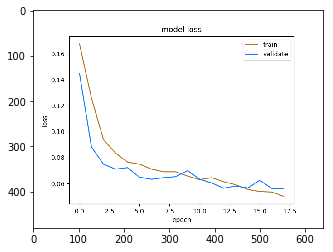

In [26]:
import matplotlib.pyplot as plt
import cv2
import glob
import os

list_of_png = glob.glob('/content/mycar/models/*png')
latest_png = max(list_of_png, key=os.path.getctime)

image = cv2.imread(latest_png)
plt.imshow(image)

#将训练好的模型放回 Donkey Car.
一旦模型训练完毕,你可以在 mycar/models中找到训练好的模型
1.下载mypilot文件到你到PC或Mac
2. 再从PC或Mac拷贝模型到你到pi

# 用Autopilot mode来驾驶Donkey car